# Dataframe from CSV on the web

by Koenraad De Smedt at UiB



---
The CSV format is a plain text representation of a table, where lines are rows and columns (or fields) are separated by a designated delimiter, often a *comma*. If the delimiter is a *tab* (tabulator character), the format is often called TSV.

Based on data from a real research project, this notebook shows how to:

1.  Make a Pandas dataframe from a CSV (or TSV) file on the web
2.  Make a series by taking a column from a dataframe
3.  Sort a series
3.  Select rows based on matching values
4.  Count and plot values.

We will use an online dataset which contains a list of new Norwegian compounds with *korona-* or *corona-*, such as *koronasyk* or *coronavirusfamilien*. The dataset has three columns:

1. The name of the newspaper in which the compound first occurred
2. The date of first occurrence
3. The second part of the compound (after *korona-* or *corona-*).

More information at https://github.com/clarino/corona/tree/master/corona21.

---

## Read dataframe from CSV on Web

In [1]:
import pandas as pd
corona_url = 'https://raw.githubusercontent.com/clarino/corona/master/corona21/korona-compounds-forms.csv'

We read this online dataset into a Pandas dataframe. The separator is a *tab* character. This dataset does not contain a header (i.e. a line with column names) so we have to name the columns explicitly.

In [2]:
occurrences = pd.read_csv(corona_url, sep='\t', header=None)
occurrences.columns = ['source', 'date', 'word']
occurrences

,source,date,word
0,VG,20/01/09,virus
1,VG,20/01/09,viruset
2,AP,20/01/16,virusfamilien
3,DB,20/01/21,familien
4,AP,20/01/21,virusutbruddet
...,...,...,...
3007,VG,21/03/07,konfliktene
3008,VG,21/03/07,konflikter
3009,AP,21/03/07,litteraturen
3010,SA,21/03/07,plater


## Sort series from column

We can now perform various operations on this dataset. For instance, we can extract only the `'word'` column. Taking a single column results in *series*, which is a one-dimensional data structure with axis labels. 

In [3]:
words = occurrences['word']
words

0                virus
1              viruset
2        virusfamilien
3             familien
4       virusutbruddet
             ...      
3007       konfliktene
3008        konflikter
3009      litteraturen
3010            plater
3011         svineriet
Name: word, Length: 3012, dtype: object

In [4]:
type(words)

pandas.core.series.Series

The series can be sorted if the values are of the same type. If the values are strings, sorting will be alphabetic. If they are numbers, sorting will be numeric. If the values are a combination of types, sorting does not make sense and may therefore not work.

In [5]:
words_sorted = words.sort_values()
words_sorted

608       17.mai
1718          19
1719          20
1256      adferd
1943    advarsel
          ...   
2892         økt
1996          øl
503         ølet
2737     ølmemer
416       øvelse
Name: word, Length: 3012, dtype: object

The series can also be sorted by other criteria, such as the length of the values, if they are strings, for instance. In order to do this, we use a *lambda function* which specifies the sorting criterion. This lambda function coerces each value `x` to a string by `.str` and then uses `.len` to take the string’s length.

In [6]:
words_sorted = words.sort_values(key=lambda x: x.str.len())
words_sorted

1996                                 øl
1012                                 tv
1793                                 de
2646                                 em
1718                                 19
                     ...               
2570             vaksinegjennombruddene
2569             vaksinasjonsprogrammet
1957            fastsydenskamklimaangst
1832           kriseninvesteringsbanken
2209    legevakt/luftveismottak/telefon
Name: word, Length: 3012, dtype: object

Note that each line still has its original index label. Suppose we want to take the longest word, which is at the top. The label `[0]` still refers to the original first row, but if we want to take the first row in the new ordering, we have to use `.iloc[0]` instead.

In [7]:
print(words_sorted[0])
print(words_sorted.loc[0])
print(words_sorted.iloc[0])

virus
virus
øl


### Exercise

*   How can you obtain the last word in the sorted series? Try.

---

## Match values

Suppose we want to know which proportion of new words contain *virus*. We select only rows which match a string (or regular expression).

In [8]:
virus_words = words[words.str.match('virus')] # regex match
print(virus_words)
print(len(virus_words)/len(words))

0                  virus
1                viruset
2          virusfamilien
4         virusutbruddet
5          virusvaksiner
              ...       
2876           viruspigg
2918             viruste
2947    virusprotokoller
2974         virusplager
3003     virusmutasjoner
Name: word, Length: 168, dtype: object
0.055776892430278883


We can limit the precision of the proportion in terms of the number of decimals that are printed. There are several ways of doing that. Here we use a *formatted string literal* (also called *f-string*).

In [9]:
print(f'{len(virus_words)/len(words)*100:.2f} percent')

5.58 percent


### Exercise

*   Select only words containing virus followed by at least five arbitrary characters. How many are there?

---

## Value counts

In which newspapers were new words first observed? To get an overview, we can count the number of times each newspaper source occurs in the dataset. Pandas has an easy way of counting values. This results in a frequency list which has the form of a series with the newspapers as indices.

In [10]:
source_counts = occurrences['source'].value_counts()
source_counts

VG    696
DB    518
AA    439
DA    371
AP    271
SA    239
DN    176
BT    158
NL    111
FV     33
Name: source, dtype: int64

Plot these counts. We could import `matplotlib.pyplot`, but Pandas has an easier `plot` method.

<Axes: title={'center': 'Corona compound counts per newspaper'}>

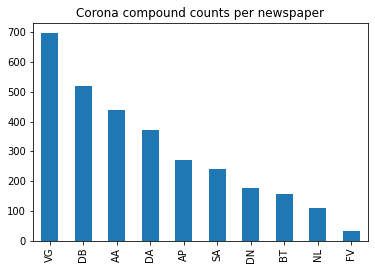

In [11]:
source_counts.plot(kind='bar', title="Corona compound counts per newspaper")

### Exercise

*  Sort the value counts of the sources in *ascending* order. Check the [documentation for `.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Then plot again.

# **Getting New Words**

In [12]:
# grouping all the words by date
words_group=occurrences.groupby('date')['word'].apply(' '.join).reset_index(name='Words by date')

In [13]:
import numpy as np   #package for handling arrrays and fast mathematical operations

In [14]:
def get_new_words(words):
  words=words.split()    #splitting gropued words based on space
  new_words=np.unique(words)   #finding new words
  return len(new_words)        #finding new lenght of new words


In [15]:
words_group['new words count']=words_group['Words by date'].apply(lambda x:get_new_words(x))

In [19]:
#sorting the words group based on their counts in descending order
data=words_group.sort_values(by=['new words count'],ascending=False)[0:10]  #selecting the top 10 data records

In [20]:
data

,date,Words by date,new words count
48,20/03/18,analyse ansvarlig arbeid baren blinde bot buds...,52
50,20/03/20,17.mai bestemmelser briefing dagene dans detek...,51
54,20/03/24,avdelingen avdelinger belastede brev diskusjon...,45
42,20/03/12,anslag arbeidet bakrusen bekymringen forbehold...,44
43,20/03/13,asyl avlysningene bidrag boom diagnostikk fest...,44
55,20/03/25,arbeidsledighet avdeling beskjed beskyttes bøl...,42
56,20/03/26,aggresjonen avstanden blogger bryllup bussen d...,37
40,20/03/10,analyser avbestillinger avlysninger delen dugn...,37
62,20/04/01,alvoret bøter challenge diktatoren fasen forbu...,36
46,20/03/16,avgjørelsene bedragere bekjempelsen dugnaden d...,36


In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'New Words Count by Date')

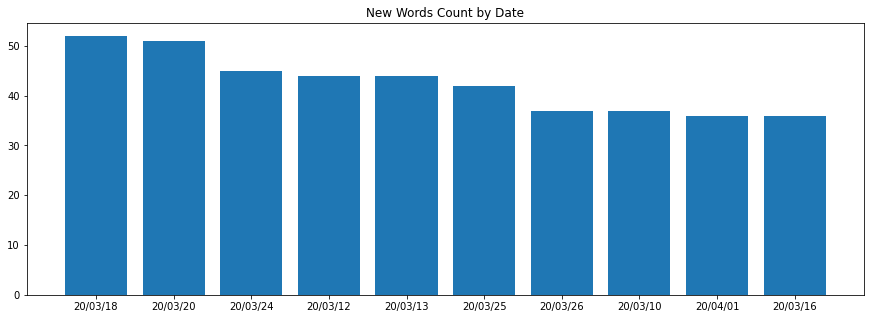

In [25]:
plt.figure(figsize=(15,5))
plt.bar(data.date,data['new words count'])
plt.title('New Words Count by Date')